# Linear regression coding from scratch using Gradient Descent method

In [3]:
import numpy as np 
import random 
import pandas as pd
import matplotlib.pyplot as plt
from mpl_toolkits.mplot3d import Axes3D

In [4]:
# Data has been downloaded from kaggle website dataset: https://www.kaggle.com/datasets
Data=pd.read_csv('Downloads\\tvmarketing.csv')

In [5]:
# Splitting the data into independent and target variables
inp=Data.TV
target=Data.Sales

In [6]:
# Reshaping the data due to its single dimensionality
inp=np.array(inp).reshape(-1,1)
target=np.array(target).reshape(-1,1)

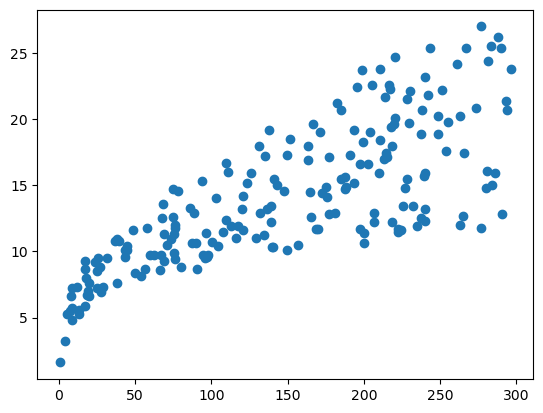

In [7]:
# Plotting and observing the trend of data
plt.scatter(inp,target,linewidth=2,s=10,c='m',cmap='viridis')
plt.xlabel('TV Adds',fontsize=16, fontweight='bold',fontfamily='serif')
plt.ylabel('Sales',fontsize=16, fontweight='bold',fontfamily='serif')
plt.title('TV advertisement vs Sales',fontsize=16, fontweight='bold',fontfamily='serif')

In [17]:
# Normalization of the independent variable for preventing the error
inp=(inp-np.min(inp))/(np.max(inp)-np.min(inp))

# 12. Write a function to estimate the weights of linear regression using gradient descent. [3]

a) Inputs: X, t, lambda2 (default 0), lambda1 (default 0), eta, max_iter, min_change_NRMSE

b) Output: Final w, final RMSE normalized with respect to variance of t.

The function is same as question 11 but with some more parameters as inputs. 

In [18]:
def MSE (y,t):
    mean_sq_error=np.sum(np.square(t-y))/t.shape[0]
    return (mean_sq_error)

In [88]:
def linear_reg_w(data,t,eta, max_iter, min_change_NRMSE,lam2=0, lam1=0):
    n,d = data.shape
    
    weight = 5*np.ones([d,1])
    bias= 5* np.ones([d,1])
    
    for i in range(max_iter):
        
        y = np.dot(data,weight)+bias
        
        plt.plot(data,y,linewidth=0.1)
        plt.title('Epoch-'+ str(i),fontsize=16, fontweight='bold',fontfamily='serif')
        plt.savefig('D:\EE769\LR_Figures\\'+str(i)+'.png',dpi=300)
        
        
        grad = (-1*(data.T@(t-y))/t.shape[0]) #+ lam2 * np.square(weight)  + lam1 * np.abs(weight)
        weight -= eta * grad
        
        grad_bias = -1 * np.mean(t-y)
        bias -= eta*grad_bias
        
        RMSE = MSE(y,t)
        if RMSE < min_change_NRMSE:
            break
            
    plt.plot(data,y,linewidth=3,c='orange')
    plt.savefig('D:\EE769\LR_Figures\\'+str(i)+'.png')
    
    return weight,y, NRMSE

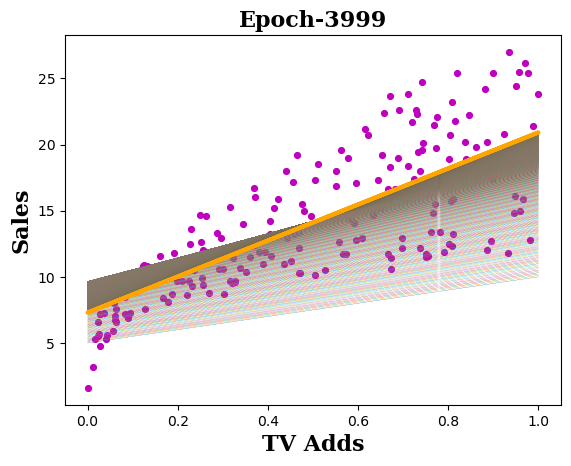

In [89]:
plt.scatter(inp,target,linewidth=2,s=10,c='m',cmap='viridis')
plt.xlabel('TV Adds',fontsize=16, fontweight='bold',fontfamily='serif')
plt.ylabel('Sales',fontsize=16, fontweight='bold',fontfamily='serif')
w,y,MSE=linear_reg_w(inp,target,lam2=0.1, lam1=0.01,eta=0.01, max_iter=4000, min_change_NRMSE=0.0001)


In [91]:
# The mean square error from the code provided above
print('The Mean Square Error:  ', MSE)

The Mean Square Error:   10.52880260213123


# Checking the result with inbult fuction from sklearn library

In [97]:
from sklearn.linear_model import LinearRegression
lr = LinearRegression()

In [98]:
lr.fit(inp,target)

LinearRegression()

In [99]:
pred=lr.coef_*inp+lr.intercept_

In [107]:
pred.shape

(200, 1)

In [ ]:
# The mean square error from sklearn linear regression model 
print('The Mean Square Error:  ', MSE(pred,target)) 

Text(0, 0.5, 'Sales')

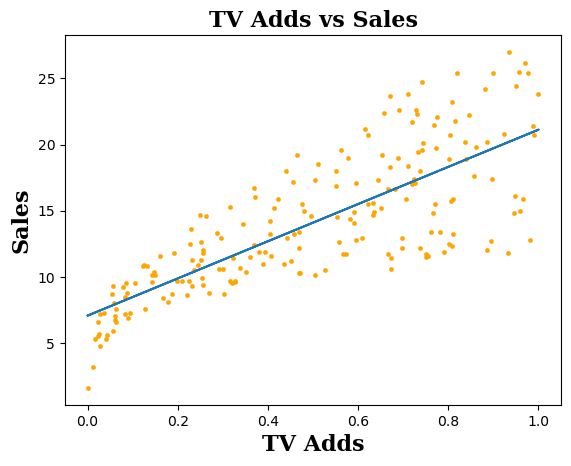

In [109]:
plt.scatter(inp,target,linewidth=0.25,s=10,c='orange',cmap='viridis')
plt.plot(inp,pred)
plt.title('TV Adds vs Sales',fontsize=16, fontweight='bold',fontfamily='serif')
plt.xlabel('TV Adds',fontsize=16, fontweight='bold',fontfamily='serif')
plt.ylabel('Sales',fontsize=16, fontweight='bold',fontfamily='serif')